<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-2-/blob/main/Diatribucion_gamma_por_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #Importamos las librerias a utilizar
from scipy.special import gamma as gm

###Vamos a simular por algoritmo de Metropoli-Hasting la distribución Gamma

$$f(x) =  \dfrac{λ(\lambda x)^{\alpha - 1} e^{-\lambda x}}{\Gamma (\alpha)} $$

In [4]:
#Comando para que que los gráficos generados por matplotlib se muestren directamente en el notebook
%matplotlib inline

In [5]:
def f(x,alp,lam):    #Definimos nuestra distribucion Gamma
 return (lam*(lam*x)**(alp-1))*np.exp(-lam*x)/gm(alp)

In [6]:
alfa = 4   #damos valores alos parametros
lamda = 1
delta = 0.2

In [7]:
n = 100000
x = np.zeros(n) # Creamos un arreglo de tamaño 'n' lleno de ceros para almacenar las muestras.
x[0] = 2   # Inicializamos la primera muestra (estado inicial) en 2.
acept = 0     # Contador para el número de propuestas aceptadas.


#La sigiente seccion del codigo el nuestro algoritmo Motropoli-Hasting
for i in range(0,n-1):
  y = x[i]+np.random.uniform(-delta,delta)  # Propuesta: generamos un nuevo valor 'y' sumando un valor aleatorio uniformemente distribuido entre (-delta, delta) al valor actual x[i]
  if y > 0: #Condicion de que el valor 'y' debe ser positivo esto por la distribucion Gamma siempre son positivos
    if np.random.rand() < min(1,f(y,alfa,lamda)/f(x[i],alfa,lamda)):
      x[i+1] = y  # Si la propuesta es aceptada, actualizamos el valor de la muestra.
      acept += 1   # Incrementamos el contador de aceptaciones.
    else:
      x[i+1] = x[i]     # Si la propuesta es rechazada, mantenemos el valor actual de la muestra.
  else:
    x[i+1] = x[i]   # Si la propuesta 'y' es negativa, la rechazamos directamente y mantenemos el valor actual de la muestra.

In [8]:
print("La aceptacion fue del ",acept/n*100,"%") #Calculamos la aceptacion del algoritmo

La aceptacion fue del  97.929 %


In [9]:
print(np.mean(x))  #Calculamos la media y la desviacion estandar de la muestra
print(np.std(x))

4.033064532595299
1.9029067558606316


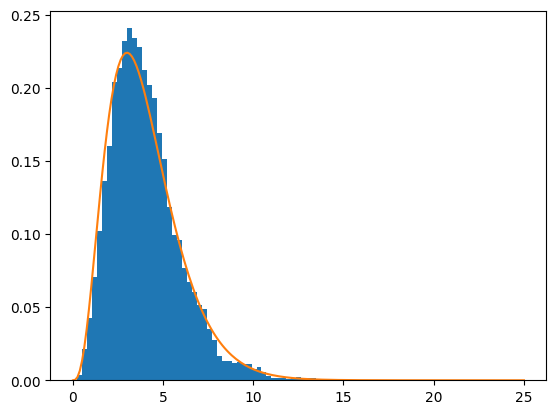

In [10]:
plt.hist(x,density=True,bins=50)  #Graficamos la distribucion Gamma teorica y la simulada
xs = np.linspace(0.01,25,200)
plt.plot(xs,f(xs,alfa,lamda))

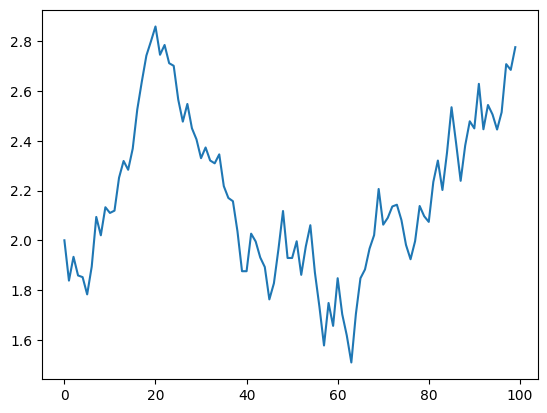

In [11]:
plt.plot(x[:100])   # Opcionalmente, graficamos las primeras 100 muestras para visualizar cómo evolucionan las muestras.